### 1. Setup & Instalation

In [ ]:
!pip install stanza pandas seaborn matplotlib openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 42.1 MB/s eta 0:00:00


In [ ]:
!pip install torch==2.5.1 --force-reinstall

import os
os.kill(os.getpid(), 9)

import torch
print(torch.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 766.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### 2. Import Library

In [ ]:
import pandas as pd
import stanza
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

##3. Load Dataset

In [ ]:
# Cell 2 — load dataset & auto detect text column
DATA_PATH = "jaklingko_text_final.csv"   # ubah sesuai path kamu

df = pd.read_csv(DATA_PATH)
print(f"Dataset dimuat: {len(df)} baris")
print("Kolom tersedia:", list(df.columns))

# --- cari kolom teks yang cocok ---
possible_text_cols = ["stemmed_text", "cleaned_text", "Teks_Stemmed", "text", "article_text", "cleaned"]
text_col = None
for c in possible_text_cols:
    if c in df.columns:
        text_col = c
        break

if not text_col:
    raise KeyError("❌ Tidak ditemukan kolom teks untuk analisis POS. Pastikan ada salah satu dari: " + ", ".join(possible_text_cols))

df = df.rename(columns={text_col: "text_for_pos"})

# --- cari kolom sentimen ---
possible_sentiment_cols = ["sentiment", "Sentimen", "Sentiment"]
sent_col = None
for c in possible_sentiment_cols:
    if c in df.columns:
        sent_col = c
        break

if not sent_col:
    raise KeyError("❌ Tidak ditemukan kolom 'sentiment' di dataset. Tambahkan dulu kolom ini.")

df = df.rename(columns={sent_col: "sentiment"})

print(f"\n✅ Kolom untuk analisis: text='{text_col}' → text_for_pos, sentiment='{sent_col}' → sentiment\n")
display(df[["text_for_pos", "sentiment"]].head(3))


Dataset dimuat: 156 baris
Kolom tersedia: ['No', 'Title', 'Source', 'Date', 'URL', 'article_text', 'cleaned_text', 'tokens', 'stemmed_tokens', 'stemmed_text', 'sentiment', 'content_label']

✅ Kolom untuk analisis: text='stemmed_text' → text_for_pos, sentiment='sentiment' → sentiment



,text_for_pos,sentiment
0,republika jakarta din nama trainee sopir mikro...,negatif
1,jakarta kompas com pemerintah tetap diskon tar...,positif
2,wartakotalive com jakarta hadir jaklingko angk...,negatif


## Initialize Model Stanza

In [ ]:
# Download model Bahasa Indonesia (kalau belum)
stanza.download("id")

# Load pipeline
nlp = stanza.Pipeline(lang="id", processors="tokenize,pos", use_gpu=False)

print("✅ Model POS Bahasa Indonesia berhasil dimuat dan siap digunakan.")


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package    |
--------------------------
| tokenize  | gsd        |
| mwt       | gsd        |
| pos       | gsd_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


✅ Model POS Bahasa Indonesia berhasil dimuat dan siap digunakan.


## Distribusi POS Tag

In [ ]:
# helper functions untuk POS tagging & examples

def pos_tags_from_text(text):
    """Return list of UPOS tags for a text."""
    if not isinstance(text, str) or not text.strip():
        return []
    doc = nlp(text)
    return [w.upos for s in doc.sentences for w in s.words]

def pos_pairs_from_text(text):
    """Return list of (word_lower, UPOS) pairs for a text."""
    if not isinstance(text, str) or not text.strip():
        return []
    doc = nlp(text)
    return [(w.text.lower(), w.upos) for s in doc.sentences for w in s.words]

# quick sanity
print("Sanity check:", pos_pairs_from_text("JakLingko mengintegrasikan layanan transportasi publik di Jakarta."))


Sanity check: [('jaklingko', 'PROPN'), ('mengintegrasikan', 'VERB'), ('layanan', 'NOUN'), ('transportasi', 'NOUN'), ('publik', 'NOUN'), ('di', 'ADP'), ('jakarta', 'PROPN'), ('.', 'PUNCT')]


,POS_Tag,Frequency
0,NOUN,22224
1,ADJ,1358
2,PROPN,1033
3,VERB,960
4,X,743
5,ADP,176
6,ADV,100
7,PRON,76
8,NUM,71
9,AUX,28


/tmp/ipython-input-3521636548.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pos_freq.head(12), x="Frequency", y="POS_Tag", palette="mako")


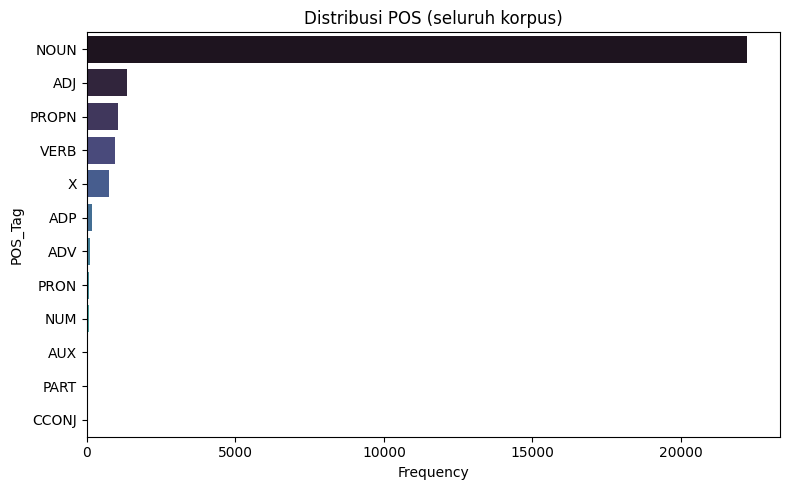

In [ ]:
# hitung frekuensi POS di seluruh korpus
all_pos = []
for txt in df["text_for_pos"].dropna():
    all_pos.extend(pos_tags_from_text(txt))

pos_counts = Counter(all_pos)
df_pos_freq = pd.DataFrame(pos_counts.most_common(), columns=["POS_Tag", "Frequency"])
display(df_pos_freq)

# plot top POS
plt.figure(figsize=(8,5))
sns.barplot(data=df_pos_freq.head(12), x="Frequency", y="POS_Tag", palette="mako")
plt.title("Distribusi POS (seluruh korpus)")
plt.tight_layout()
plt.show()


## Top Words POS_TAG

In [ ]:
from collections import Counter
import pandas as pd

def analyze_pos_overall(df, target_pos=["NOUN", "VERB", "ADJ", "PROPN"], top_k=10):
    """
    Menghasilkan ringkasan POS keseluruhan:
    POS_Tag | Total Frequency | Top 10 Words (Frequency)
    """
    pos_word_counts = {p: Counter() for p in target_pos}

    print("🔍 Memulai analisis POS untuk seluruh teks ...")

    # Loop semua teks
    for text in df["text_for_pos"].dropna():
        doc = nlp(text)
        for sent in doc.sentences:
            for w in sent.words:
                if w.upos in target_pos:
                    pos_word_counts[w.upos][w.text.lower()] += 1

    # Susun hasil ke DataFrame
    results = []
    for pos_tag, counter in pos_word_counts.items():
        total_freq = sum(counter.values())
        if total_freq == 0:
            continue

        # Ambil kata teratas per POS
        top_words = counter.most_common(top_k)
        formatted_top = "; ".join([f"{w} ({c})" for w, c in top_words])

        results.append({
            "POS_Tag": pos_tag,
            "Total Frequency": total_freq,
            "Top 10 Words (Frequency)": formatted_top
        })

    # Hasil akhir
    df_summary = pd.DataFrame(results)
    df_summary = df_summary.sort_values("POS_Tag").reset_index(drop=True)
    return df_summary

# --- Jalankan analisis ---
df_pos_summary = analyze_pos_overall(df)

# --- Tampilkan hasil ---
with pd.option_context('display.max_colwidth', None):
    display(df_pos_summary)

# --- Simpan hasil ---
df_pos_summary.to_excel("pos_summary_overall.xlsx", index=False)
df_pos_summary.to_csv("pos_summary_overall.csv", index=False)


🔍 Memulai analisis POS untuk seluruh teks ...


,POS_Tag,Total Frequency,Top 10 Words (Frequency)
0,ADJ,1358,mudah (102); salah (90); utama (60); gratis (58); nyaman (44); top (41); normal (40); resmi (39); operasional (35); dasar (31)
1,NOUN,22224,jaklingko (974); jakarta (548); transportasi (438); mikrotrans (339); transjakarta (264); integrasi (239); angkutan (214); rute (203); angkot (200); sopir (195)
2,PROPN,1033,jakarta (276); indonesia (140); tangerang (57); provinsi (41); tanjung (38); gubernur (35); dki (21); com (19); budi (18); depok (17)
3,VERB,960,masuk (41); jadi (40); hadir (25); butuh (23); turun (21); sebut (21); pilih (21); lanjut (20); baca (19); selesai (19)


## Visualisasi POS_Tag

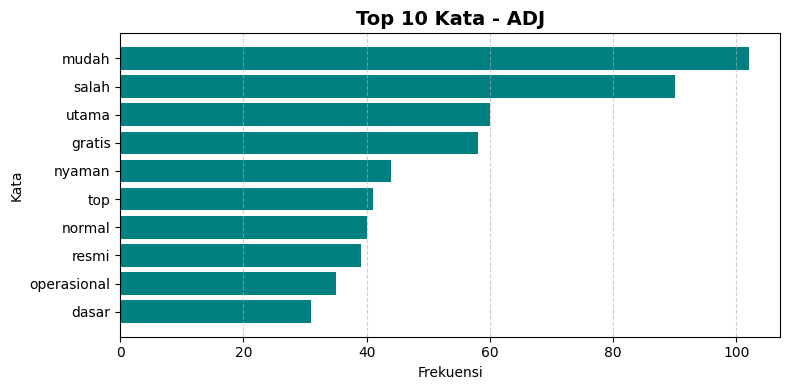

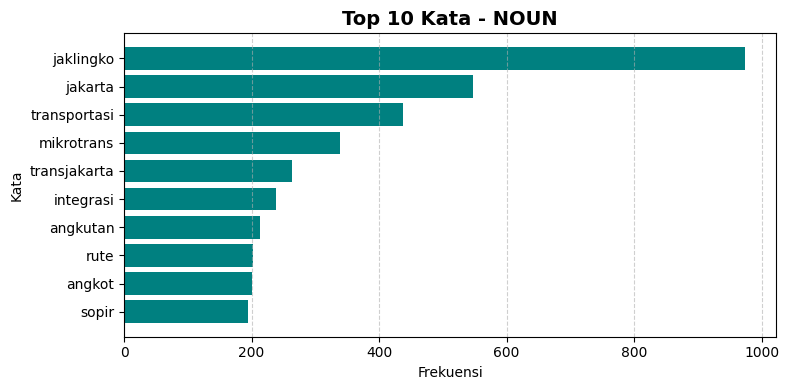

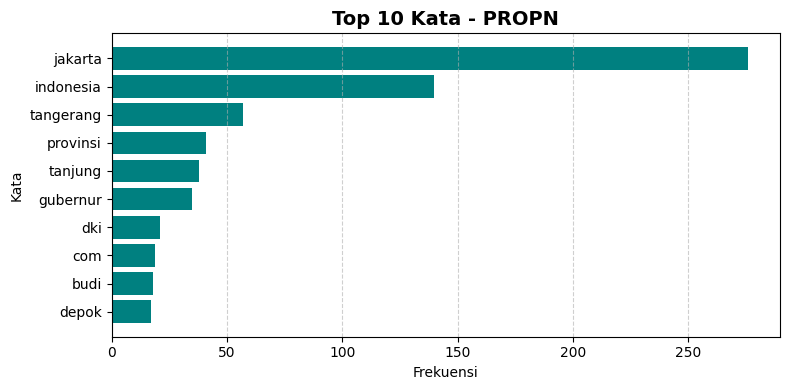

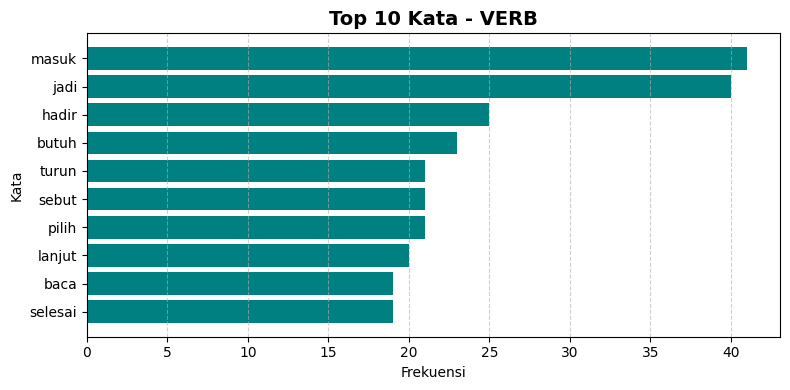

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_top_words_per_pos(df_pos_summary):
    """
    Membuat visualisasi bar chart untuk top 10 kata pada setiap POS_Tag.
    df_pos_summary harus berisi kolom:
    ['POS_Tag', 'Top 10 Words (Frequency)']
    """
    plt.style.use("seaborn-v0_8-muted")

    for _, row in df_pos_summary.iterrows():
        pos_tag = row["POS_Tag"]
        top_words = row["Top 10 Words (Frequency)"]

        # Pisahkan pasangan kata (frequency)
        words, counts = [], []
        for item in top_words.split("; "):
            try:
                word, freq = item.rsplit(" (", 1)
                words.append(word.strip())
                counts.append(int(freq.replace(")", "")))
            except:
                continue

        # Lewati jika kosong
        if not words:
            continue

        # Plot bar chart
        plt.figure(figsize=(8, 4))
        plt.barh(words[::-1], counts[::-1], color="teal")
        plt.title(f"Top 10 Kata - {pos_tag}", fontsize=14, fontweight='bold')
        plt.xlabel("Frekuensi")
        plt.ylabel("Kata")
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

# --- Jalankan visualisasi ---
visualize_top_words_per_pos(df_pos_summary)
